In [2]:
import sympy

In [3]:
sympy.init_printing()

In [4]:
x, t = sympy.symbols('x t')
v = sympy.Function('v')
Pi = sympy.Function('Pi')
zeta = sympy.symbols('zeta', positive=True)
tau_Pi = sympy.symbols('tau_Pi', positive=True)
U = sympy.symbols('U')

In [5]:
import numpy as np
from scipy.optimize import brentq, newton, minimize_scalar
from scipy.integrate import solve_ivp, solve_bvp
from scipy.special import erf
import matplotlib.pyplot as plt

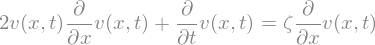

In [6]:
toy_bulk_limit = sympy.Eq(v(x,t).diff(t) + 2*v(x,t)*v(x,t).diff(x), zeta*v(x,t).diff(x))
toy_bulk_limit

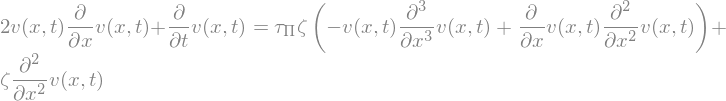

In [7]:
toy_bulk_CE = sympy.Eq(v(x,t).diff(t) + 2*v(x,t)*v(x,t).diff(x), zeta*v(x,t).diff(x,2) + tau_Pi*zeta*(v(x,t).diff(x)*v(x,t).diff(x,2) - v(x,t)*v(x,t).diff(x,3)) )
toy_bulk_CE

In [8]:
eq_213a = sympy.Eq(U*v(x,t).diff(t),2*v(x,t)*v(x,t).diff(x) + Pi(x,t).diff(x))
eq_213a

In [ ]:
eq_213b = sympy.Eq(U*v(x,t).diff(t),2*v(x,t)*v(x,t).diff(x) + Pi(x,t).diff(x))
eq_213b